# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

10.0


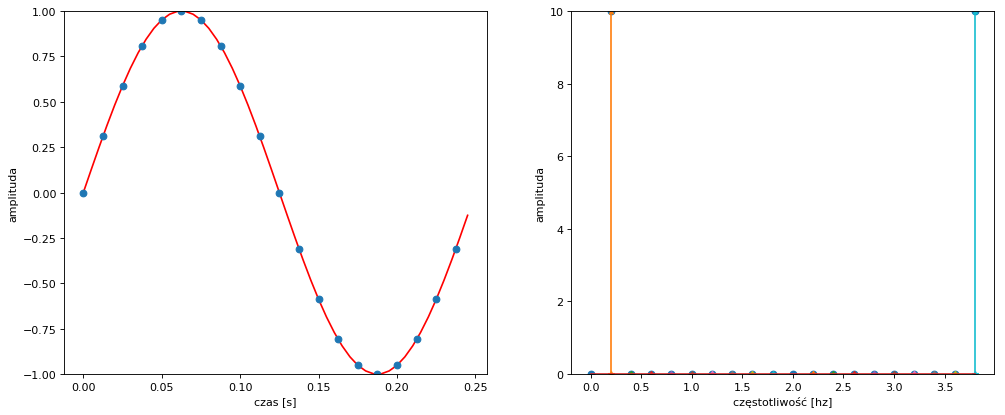

In [2]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

def do_the_job(A = 1, LP = 1, w = 40, f = 2.0, hz=False, labels=False):
    T = 1.0/f
    TW = 1.0/w
    t = np.arange(0, LP*T, TW)
    FUNC = lambda t : A*sin(2*pi*t*f)
    # generujemy momenty, w których pobieramy próbki
    n = len(t)
    signal = FUNC(t)                 
    # funkcja sprobkowana
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    if labels:
        plt.xlabel("czas [s]")
        plt.ylabel("amplituda")
    ## --- 
    ax.plot(t, signal, 'o')
    
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = range(int(n))
    freqs = [x*f/n for x in freqs]

    ax = fig.add_subplot(122)
    if labels:
        plt.xlabel("częstotliwość [hz]")
        plt.ylabel("amplituda")
    ymax = max(signal1)
#     ymax = max([x for x in signal1 if x < ymax])
    print(ymax)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
        
    # y = w/(f*2)*A
    stem(freqs, signal1, '-*')
    show()
    
do_the_job(hz=True, labels=True, w=80, f=4, A=1)

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [ ]:
# Zdefiniuj funckję


UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [ ]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

b) Zmień częstotliwość próbkowania na 50Hz.

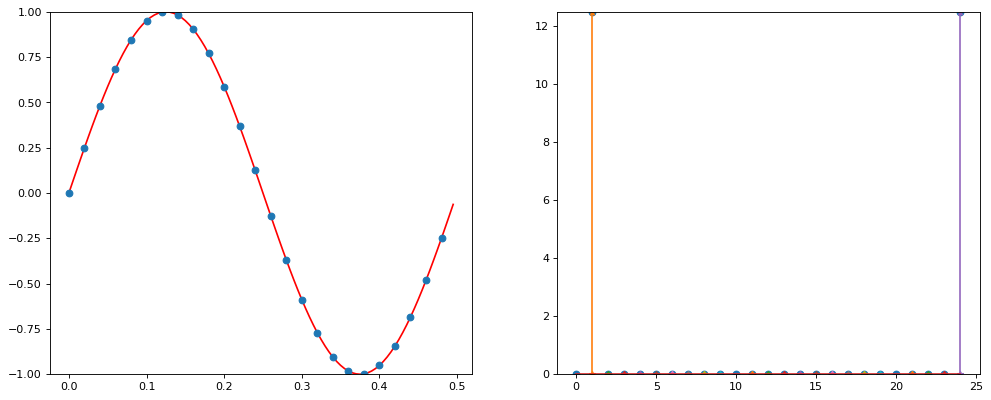

In [8]:
# w=50
do_the_job(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

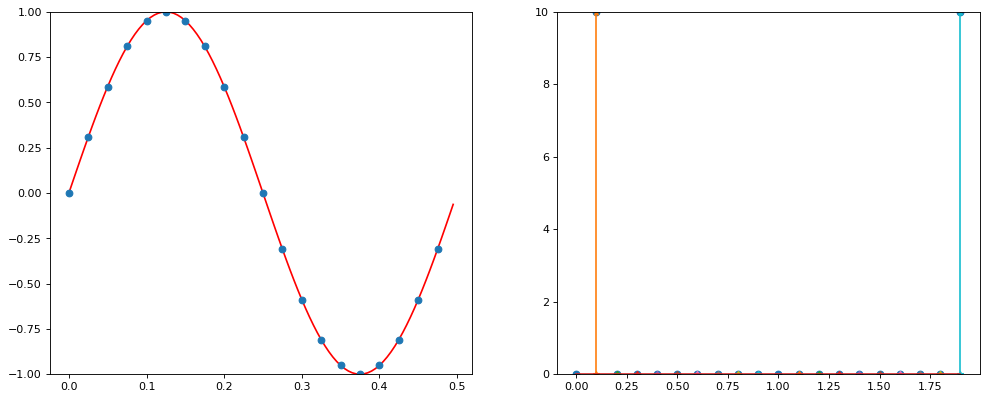

In [7]:
do_the_job(hz=True)

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [ ]:
# Podpisz osie wykresów

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

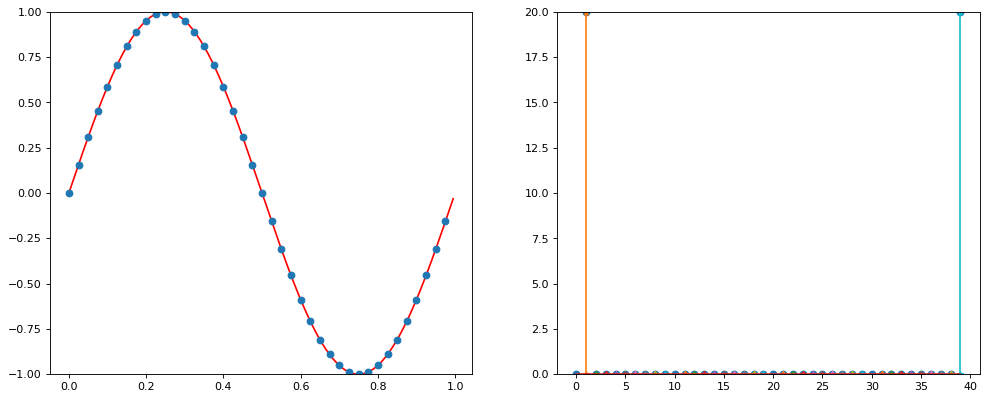

In [12]:
# f=1, A=1, LP=1
do_the_job(f=1, A=1, LP=1)

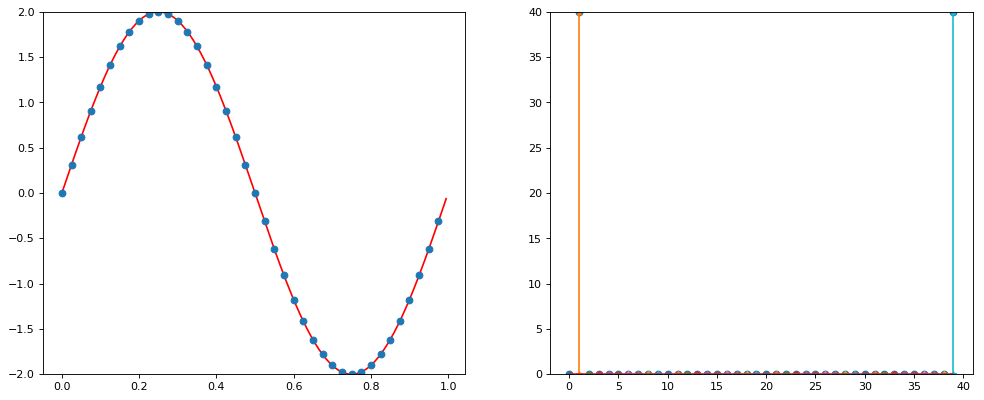

In [13]:
# f=1, A=2, LP=1
do_the_job(f=1, A=2, LP=1)

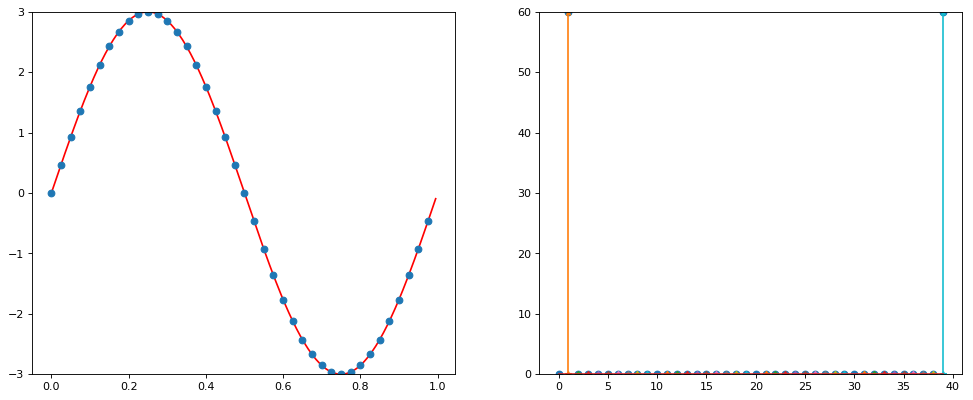

In [14]:
# f=1, A=3, LP=1
do_the_job(f=1, A=3, LP=1)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

1.09963813004e-14


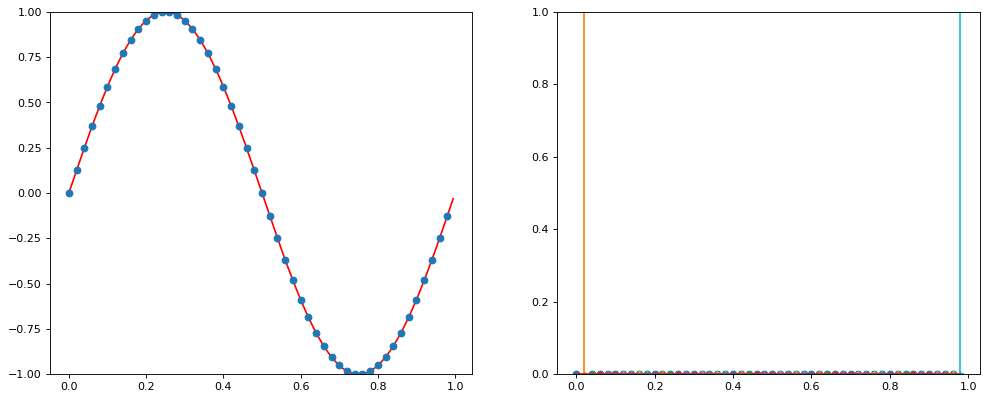

In [30]:
# f=1, w=50, LP=1

do_the_job(f=1, w=50, LP=1, hz=True)

In [ ]:
# f=1, w=100, LP=1

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [ ]:
# popraw oś OY

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

40.0


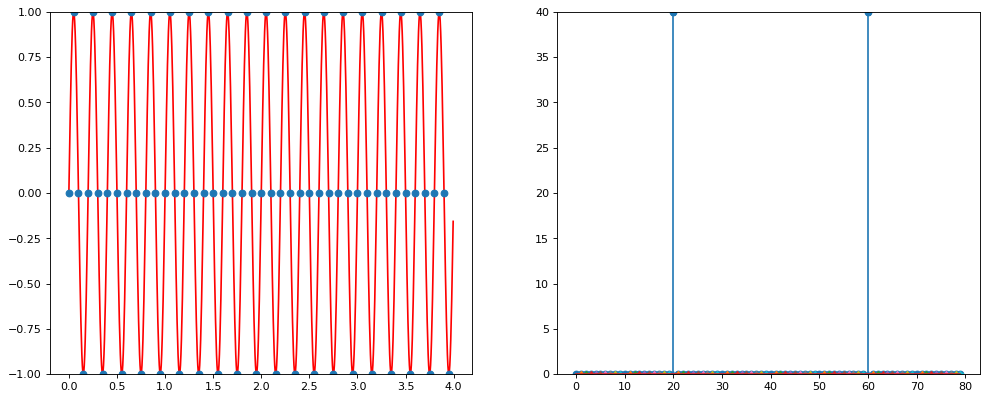

In [6]:
do_the_job(f=5, w=20, LP=20)

10.0


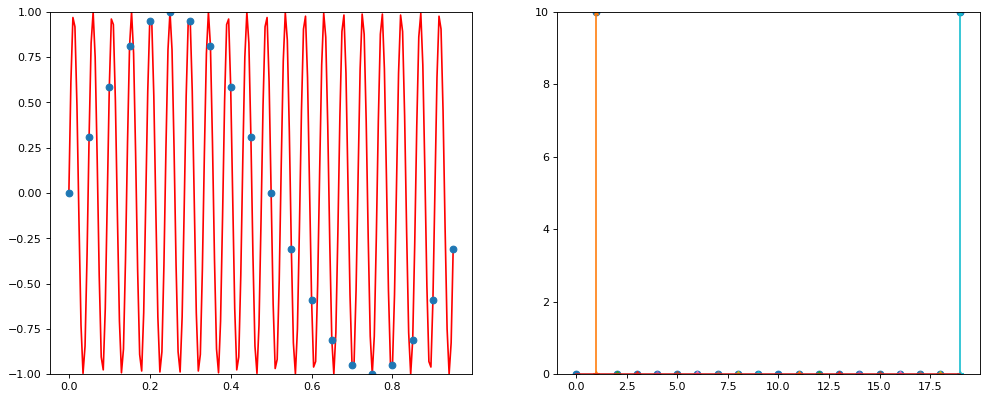

In [7]:
do_the_job(f=21, w=20, LP=20)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

50.0


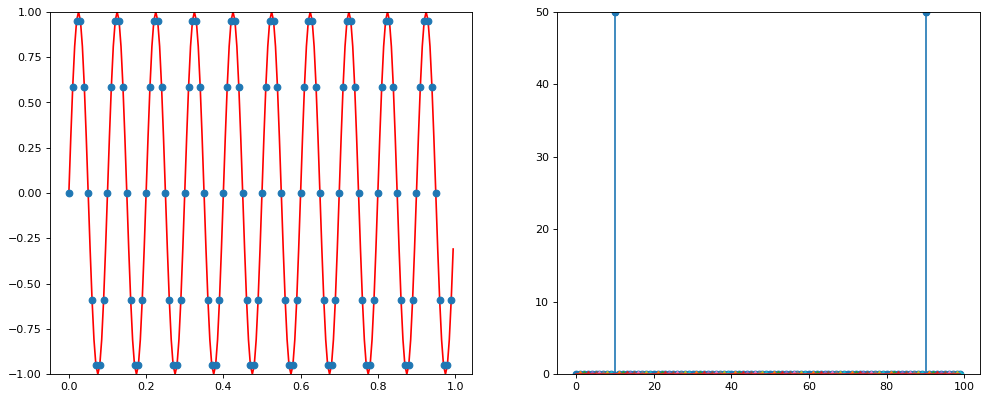

In [5]:
do_the_job(f=10, w=100, A=1, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

25.0


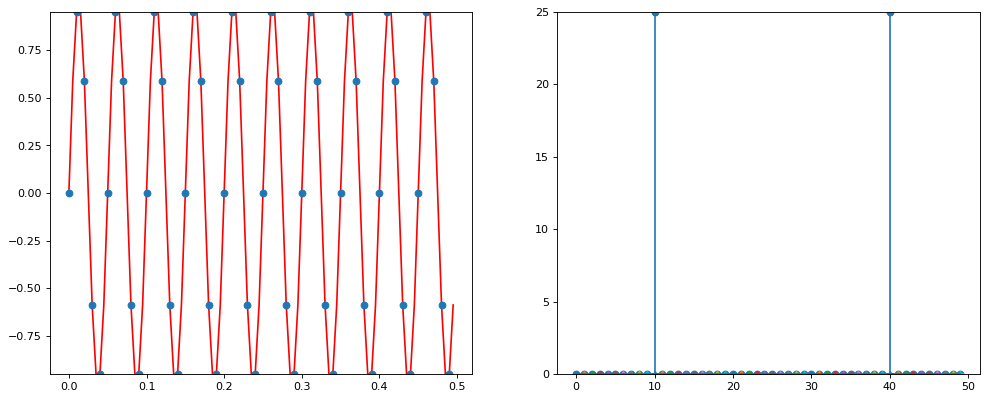

In [4]:
do_the_job(f=20, w=100, A=1, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

15.6567143814


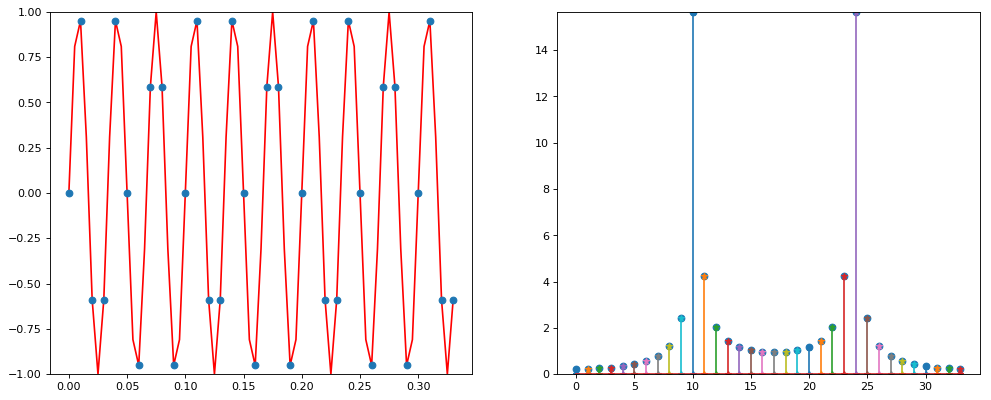

In [3]:
# f=30, w=100, A=1, LP=10
do_the_job(f=30, w=100, A=1, LP=10)

iv) $sin(2*pi*t*f)$, $f=40Hz$

12.5


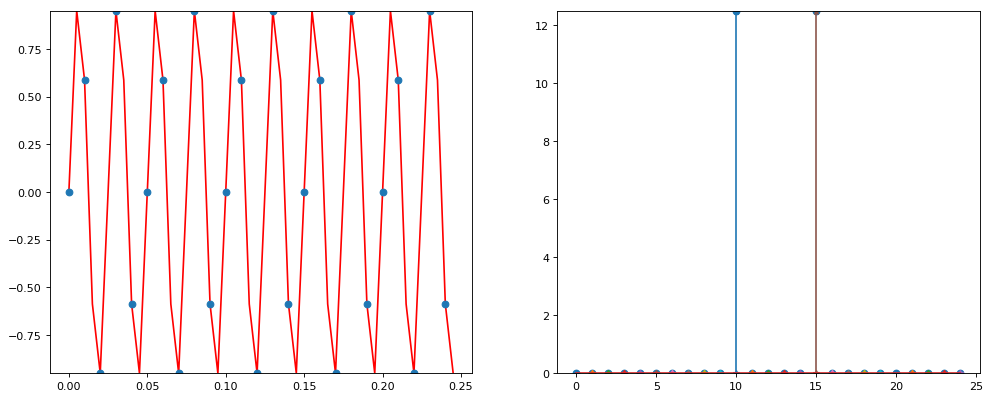

In [8]:
do_the_job(f=40, w=100, A=1, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

2.50208453591e-14


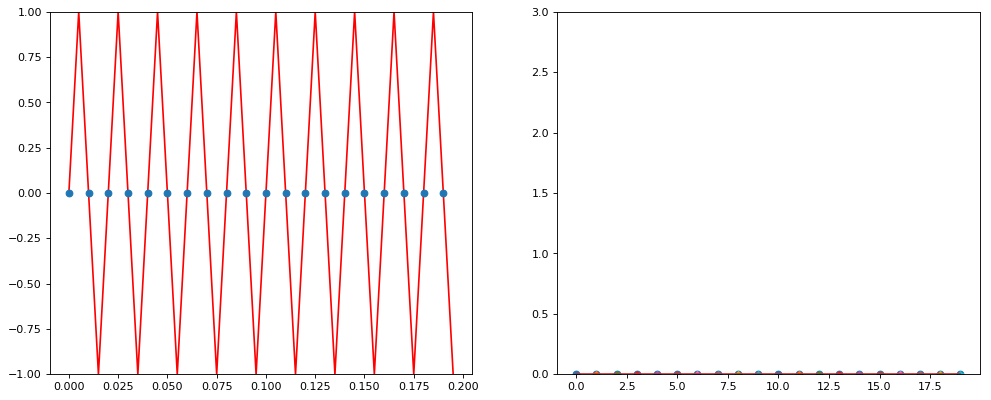

In [9]:
do_the_job(f=50, w=100, A=1, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

In [ ]:
# Wyrysuj sygnał

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

In [ ]:
# Wyrysuj sygnał


e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

In [ ]:
# faza = 0


In [ ]:
# faza = pi/4


# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [11]:
# wygeneruj wektor x
x = random.random(10)
x

array([ 0.4405392 ,  0.77447986,  0.92422798,  0.01910096,  0.08151952,
        0.02112052,  0.72258469,  0.93377159,  0.44381599,  0.66187428])

In [12]:
# oblicz fft z x
ix = fft(x)
ix

array([ 5.02303460 +0.00000000e+00j,  1.05921464 +7.23625274e-01j,
       -0.72366149 -1.53679247e+00j, -0.11183804 +2.47344119e-01j,
       -0.63370651 +8.83805865e-01j,  0.20234017 +2.77555756e-16j,
       -0.63370651 -8.83805865e-01j, -0.11183804 -2.47344119e-01j,
       -0.72366149 +1.53679247e+00j,  1.05921464 -7.23625274e-01j])

In [15]:
# oblicz ifft
xi = ifft(ix)
xi

array([ 0.44053920 +5.55111512e-18j,  0.77447986 +1.38777878e-16j,
        0.92422798 -2.59142418e-17j,  0.01910096 -9.59109406e-17j,
        0.08151952 +3.59943531e-16j,  0.02112052 -3.43724663e-16j,
        0.72258469 +2.93992909e-17j,  0.93377159 +3.91136847e-16j,
        0.44381599 -2.30201817e-16j,  0.66187428 -2.29056999e-16j])

In [ ]:
#porownaj x z ifft(fft(x)), wystarczy print

In [16]:
print(xi)
print(x)

[ 0.44053920 +5.55111512e-18j  0.77447986 +1.38777878e-16j
  0.92422798 -2.59142418e-17j  0.01910096 -9.59109406e-17j
  0.08151952 +3.59943531e-16j  0.02112052 -3.43724663e-16j
  0.72258469 +2.93992909e-17j  0.93377159 +3.91136847e-16j
  0.44381599 -2.30201817e-16j  0.66187428 -2.29056999e-16j]
[ 0.4405392   0.77447986  0.92422798  0.01910096  0.08151952  0.02112052
  0.72258469  0.93377159  0.44381599  0.66187428]
